In [1]:
!pwd

/Users/kpadhikari/GitStuff/KPAdhikari/PythonStuff/IPython_Jupyter_Notebooks/ML_Stuff


# Introduction to the Lifecycle of Data Science project

This notebook was started as I planned to go step-by-step through this article https://www.analyticsvidhya.com/blog/2021/10/introduction-to-the-lifecycle-of-data-science-project/ (by Yash Khandelwal — October 6, 2021) which, in turn, was first published part of the [Data Science Blogathon](https://datahack.analyticsvidhya.com/contest/data-science-blogathon-12/).

## Overview of Lifecycle of Data Science Project
With the increasing demand for Data Scientists, more people are willing to enter into this field. It has become very important to showcase the right skills for Data Science to stand out from the crowd to get placed in the top companies. This is where the projects come into play. Moreover, end-to-end projects give you exposure to a real-time work environment. **In this guide, I’ll be explaining the complete life-cycle of a Data Science project with a hands-on demo.** We’ll be taking a Machine Learning problem statement and build a web application as its solution using Flask and deploy it on Heroku, a cloud application platform. Let’s get started!

## Understanding the Lifecycle of Data Science project using a Problem
The life cycle of a project begins the understanding the problem [statement](https://www.hackerearth.com/challenges/competitive/hackerearth-machine-learning-challenge-predict-burnout-rate/). The problem statement (source) for the project is: To build a web-based application with a machine learning model at the backend that predicts the burnout rate of company employees based on various work-life factors such as – working hours, work-from-home availability, mental fatigue score, and the like. 

### Case Study: 
Happy and healthy employees are undoubtedly more efficient at work. They assist the company to thrive. However, the scenario in most of the companies has changed with the pandemic. Since work from home, over 69% of the employees have been showing burnout symptoms (survey source: [Monster](https://learnmore.monster.com/poll-results-from-work-in-the-time-of-coronavirus)). The burnout rate is indeed alarming. Many companies are taking steps to ensure their employees stay mentally healthy. As a solution to this, we’ll build a web app that can be used by companies to monitor the burnout of their employees. Also, the employees themselves can use it to keep a check on their burnout rate (no time to assess the mental health in the fast work-life 😔).

## Gathering Relevant Data
There are many libraries in python – Beautiful Soap, Selenium for scraping data. Besides, there are also web scraping APIs like ParseHub, Scrappy, Octoparse that make this less time-consuming. Web scrapping is a crucial part of a Data Science project because the lifecycle depends on the quality and relevance of the Data. 

In this project, the dataset has been taken from Kaggle(https://www.kaggle.com/blurredmachine/are-your-employees-burning-out). Have a look at the data before reading further.

### Dataset

The following are the data attributes and their description – 

* Employee ID: The unique ID allocated by the company to each employee.
* Date of Joining: The date when the employee had joined the company.
* Gender: The gender of the employee.
* Company Type: The type of company where the employee is working in (Service/Product).
* WFH Setup Available: If the work from the home facility is available for the employee (Yes/No).
* Designation: The designation of the employee in his/her organization. In range – [0.0, 5.0], 0.0 is the lowest designation and 5.0 is the highest.
* Resource Allocation: The number of resources allocated to the employee to work, to be interpreted as the number of working hours. In range – [1.0, 10.0] (higher means more resources).
* Mental Fatigue Score: How much mentally tired is the employee in the working hours in the range – [0.0, 10.0] where 0.0 means no fatigue and 10.0 means completely fatigue.
* Burn Rate: The target value in the data of each employee telling the rate of burnout during working hours in the range – [0.0, 1.0] where the higher the value is more is the burnout.

Few important notes about the data: 

1. Difference between Stress and Burnout is that burnout is a different state of mind. Under stress, you still manage to cope with pressures. But once burnout takes hold, you’re out of gas and you’ve given up all hope of surmounting your deterrents.
2. When you’re suffering from burnout, you feel more than just being mentally fatigued.

## Data Preparation and EDA (Exploratory Data Analysis)

After collecting the data, data preparation comes into play. It involves cleaning and organizing the data, which is known to take up more than 80% of data scientists’ work. The real-world data is raw and can be full of duplicates, missing values, and wrong information. Hence the data needs to be cleaned.

Once the data has been organized, we extract the information enfolded in the data and summarize its main characteristics through **exploratory data analysis**. EDA is an important stage for a well-defined data science project. It is performed before the statistical or machine learning modeling phase. 

Enough of theory let’s begin the hands-on part!

In [2]:
import pandas as pd

#I dowonloaded these three files from https://www.kaggle.com/blurredmachine/are-your-employees-burning-out?select=train.csv
dftr = pd.read_csv("./data/train.csv")
dftt = pd.read_csv("./data/test.csv")
dfss = pd.read_csv("./data/sample_submission.csv") #I think this is the result submitted
print(dfss.shape, dftr.shape, dftt.shape)
#display(df.head())
print(dfss)
print("\nWe have one extra column because it's for training and thus is a labelled data (the labels/expected values make that column\n")
display(dftr.head(2)) 
display(dftt.head(2))

(5, 2) (22750, 9) (12250, 8)
                Employee ID  Burn Rate
0  fffe32003000360033003200       0.16
1      fffe3700360033003500       0.36
2  fffe31003300320037003900       0.49
3  fffe32003400380032003900       0.20
4  fffe31003900340031003600       0.52

We have one extra column because it's for training and thus is a labelled data (the labels/expected values make that column



,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2.0,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1.0,2.0,5.0,0.36


,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score
0,fffe31003300390039003000,2008-12-10,Female,Service,No,2.0,5.0,7.7
1,fffe31003300310037003800,2008-08-14,Female,Product,Yes,1.0,2.0,5.2


In [3]:
dftr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Employee ID           22750 non-null  object 
 1   Date of Joining       22750 non-null  object 
 2   Gender                22750 non-null  object 
 3   Company Type          22750 non-null  object 
 4   WFH Setup Available   22750 non-null  object 
 5   Designation           22750 non-null  float64
 6   Resource Allocation   21369 non-null  float64
 7   Mental Fatigue Score  20633 non-null  float64
 8   Burn Rate             21626 non-null  float64
dtypes: float64(4), object(5)
memory usage: 1.6+ MB



There are 5 categorical features and 4 numerical features. Out of the 5, all the features are useful except the employee id as it has nothing to do with the target i.e – Burn Rate. Let us first perform exploratory data analysis and alongside we’ll transform the categorical features into a form that can be understood by the model.

`#Date` and month might not be a useful feature. But the year of joining is. It has some significant information that the model can use.

In [4]:
dftr['Year of Joining'] = dftr['Date of Joining'].apply(lambda x : x.split('-')[0]) 
print("kp: [0], [1] & [2] after split gives year, month, day from a date such as '2008-09-30'")
dftr.head(2)

kp: [0], [1] & [2] after split gives year, month, day from a date such as '2008-09-30'


,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,Year of Joining
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2.0,3.0,3.8,0.16,2008
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1.0,2.0,5.0,0.36,2008


In [5]:
#dftr["Year of Joining"].info() #doesn't work
dftr["Year of Joining"].describe()

count     22750
unique        1
top        2008
freq      22750
Name: Year of Joining, dtype: object

**Output** – The feature has only one unique value i.e 2008. This may not be a useful feature. So we drop it.

In [6]:
dftr.drop('Year of Joining', axis=1, inplace=True)
dftr.head(2)

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2.0,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1.0,2.0,5.0,0.36


## An aside/digression: About axes in Series and Dataframes
([Ref](https://railsware.com/blog/python-for-machine-learning-pandas-axis-explained/#:~:text=A%20DataFrame%20object%20has%20two,it%20goes%20along%20rows%20direction.))

Series is a one-dimensional array of values. Under the hood, it uses NumPy ndarray. That is where the term “axis” came from. NumPy uses it quite frequently because ndarray can have a lot of dimensions.

Series object has only “axis 0” because it has only one dimension.

![pandas-series-axis](./Images/pandas-series-axis.png)

In [7]:
import pandas as pd
list = ['red','green','blue','white','black']
series = pd.Series(list)
series

0      red
1    green
2     blue
3    white
4    black
dtype: object

The arrow on the image displays “axis 0” and its direction for the Series object.

Usually, in Python, one-dimensional structures are displayed as a row of values. On the contrary, here we see that Series is displayed as a column of values.

Each cell in Series is accessible via index value along the “axis 0”. For our Series object indexes are: 0, 1, 2, 3, 4.

In [8]:
series[2]

'blue'

![dataframe axes](./Images/data-frame-axes.png)

A DataFrame object has two axes: “axis 0” and “axis 1”. “axis 0” represents rows and “axis 1” represents columns. Now it’s clear that Series and DataFrame share the same direction for “axis 0” – it goes along rows direction.

Our DataFrame object has 0, 1, 2, 3, 4 indexes along the “axis 0”, and additionally, it has “axis 1” indexes which are: ‘a’ and ‘b’.

To access an element within DataFrame we need to provide two indexes (one per each axis). Also, instead of bare brackets, we need to use .loc method:

```python
 import pandas as pd
 srs_a = pd.Series([1,3,6,8,9])
 srs_b = pd.Series(['red', 'green', 'blue', 'white', 'black'])
 df = pd.DataFrame({'a': srs_a, 'b': srs_b})
 df.loc[2, 'b']
```
'blue'
```python
df.loc[3, 'a']
```
8

<font color="magenta">kp: Please note that we pass a `python list` to `pandas.Series()` to make a series, and a 'python dictionary' (with a `Series` as a value for each key) to create a dataframe such that the keys become the indices along the axis=1 (or the labels of the columns, with each Series creating a corresponding column).</font>

### Using “axis” parameter in API calls
There are a lot of different API calls for Series and DataFrame objects which accept “axis” parameter. Series object has only one axis, so this parameter always equals 0 for it. Thus, you can omit it, because it does not affect the result.

On the contrary, DataFrame has two axes, and “axis” parameter determines along which axis an operation should be performed. For example, .sum can be applied along “axis 0”. That means, .sum operation calculates a sum for each column:

In [9]:
import pandas as pd
srs = pd.Series([1, 3, pd.np.nan, 4, pd.np.nan])
display(srs.head())
srs.dropna()

/var/folders/bs/v93xlq0d24n2x1clkyc1lk840000gp/T/ipykernel_53347/1543565621.py:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  srs = pd.Series([1, 3, pd.np.nan, 4, pd.np.nan])


0    1.0
1    3.0
2    NaN
3    4.0
4    NaN
dtype: float64

0    1.0
1    3.0
3    4.0
dtype: float64

In [10]:
srs.dropna(axis=0)

0    1.0
1    3.0
3    4.0
dtype: float64

In [11]:
import pandas as pd
srs_a = pd.Series([10,30,60,80,90])
srs_b = pd.Series([22, 44, 55, 77, 101])
df = pd.DataFrame({'a': srs_a, 'b': srs_b})
display(df)
print("\n ====== Result of df.sum(axis=0) \n")
display(df.sum(axis=0))
print("\n ====== Result of df.sum(axis=1) \n")
df.sum(axis=1)

,a,b
0,10,22
1,30,44
2,60,55
3,80,77
4,90,101



 ====== Result of df.sum(axis=0) 



a    270
b    299
dtype: int64


 ====== Result of df.sum(axis=1) 



0     32
1     74
2    115
3    157
4    191
dtype: int64

**<font color="magenta">============ End of the aside/digression: About axes in Series and Dataframes ============= </font>** 

---------

Let’s do some EDA on other categorical features. Alongside we’ll also do the Data Preparation part –

## Exploratory Data Analysis (EDA)

<AxesSubplot:xlabel='Gender', ylabel='Burn Rate'>

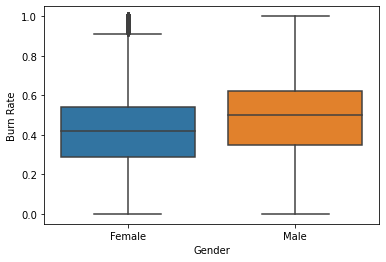

In [12]:
import seaborn as sns

sns.boxplot(x = 'Gender', y = 'Burn Rate', data = dftr)

The average (median) Burnout Rate among the male employees is higher than that in female employees. Let’s find the possible reasons by comparing other factors like –  designation, working hours, etc. among the two genders in the company.

**Note** – The boxplot shows that there are outliers in the Burn Rate records of female employees. We’ll have to take care of it.

<AxesSubplot:xlabel='Gender', ylabel='count'>

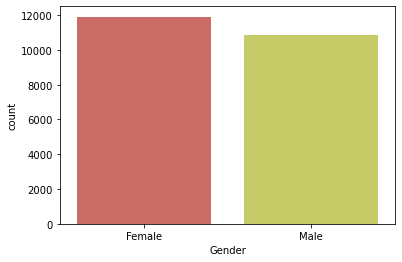

In [13]:
sns.countplot(x = 'Gender', palette=sns.color_palette("hls"), data = dftr)

<AxesSubplot:xlabel='Gender', ylabel='count'>

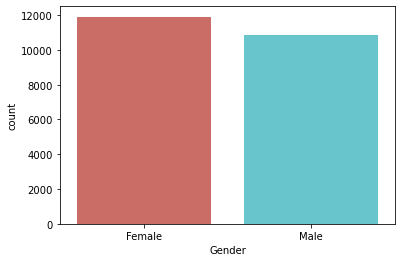

In [14]:
sns.countplot(x = 'Gender', palette=sns.color_palette("hls",2), data = dftr) #Looks like ("hls", 7) is closer to the default

<AxesSubplot:xlabel='Gender', ylabel='count'>

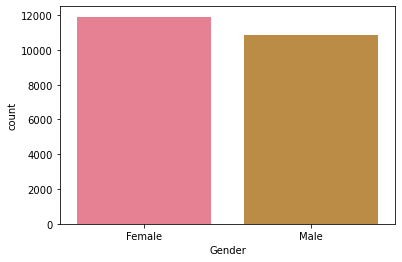

In [15]:
sns.countplot(x = 'Gender', palette=sns.color_palette("husl",8), data = dftr) #Looks like ("hls", 7) is closer to the default

The data has more records of female employees.

In [16]:
print(dftr.columns)
display(dftr.head())
dftr['Designation'].describe()

Index(['Employee ID', 'Date of Joining', 'Gender', 'Company Type',
       'WFH Setup Available', 'Designation', 'Resource Allocation',
       'Mental Fatigue Score', 'Burn Rate'],
      dtype='object')


,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2.0,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1.0,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2.0,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1.0,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3.0,7.0,6.9,0.52


count    22750.000000
mean         2.178725
std          1.135145
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          5.000000
Name: Designation, dtype: float64

<AxesSubplot:xlabel='Designation', ylabel='count'>

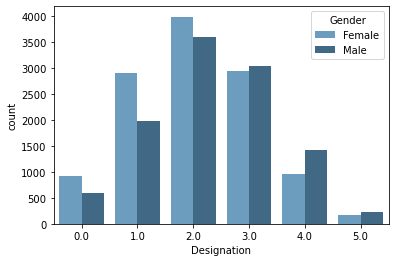

In [17]:
sns.countplot(x = 'Designation', hue = 'Gender', palette = 'Blues_d', data = dftr)

There are more male working at higher designation.

### Another Aside/Digression: HSL Colors
Ref: https://www.w3schools.com/colors/colors_hsl.asp

HSL color values are supported in IE9+, Firefox, Chrome, Safari, and in Opera 10+.

**<font color="red">HSL stands for hue, saturation, and lightness.</font>**

HSL color values are specified with: hsl(hue, saturation, lightness).

#### Hue
Hue is a degree on the color wheel from 0 to 360. 0 is red, 120 is green, 240 is blue.

#### Saturation
Saturation is a percentage value; 0% means a shade of gray and 100% is the full color.

#### Lightness
Lightness is also a percentage; 0% is black, 100% is white.

#### Try it Yourself
HSL color values are supported in all major browsers.

```html
<style>
div {
    background-color: hsl(180, 50%, 50%);
    color: hsl(0, 0%, 100%);
}
</style>
```
<font color="magenta">======== kp: End of the Aside/Digression on 'HLS' colors =======</font>

-----------

<AxesSubplot:xlabel='Gender', ylabel='Resource Allocation'>

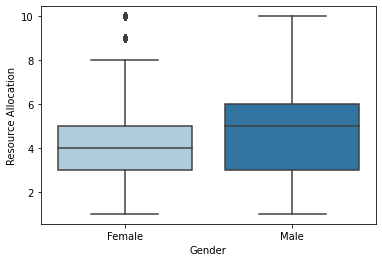

In [18]:
sns.boxplot(x = 'Gender', y = 'Resource Allocation', palette=sns.color_palette("Paired"), data = dftr)

While most of the female employees work up to 8 hours, the male employees work up to 10 hours. Average working (median) hours between both genders differ by 1 hour.

**Note** – Again we observe outliers in the feature – Resource Allocation in the female records.

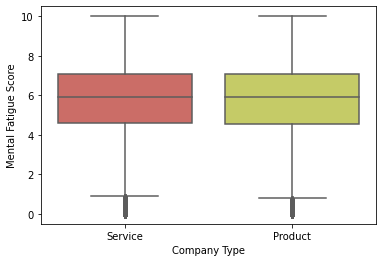

In [19]:
sns.boxplot(x = 'Company Type', y = 'Mental Fatigue Score',palette=sns.color_palette("hls"),data = dftr);

The fatigue scores remain equal for the two types of companies. Note – Outliers

<AxesSubplot:xlabel='Mental Fatigue Score', ylabel='Burn Rate'>

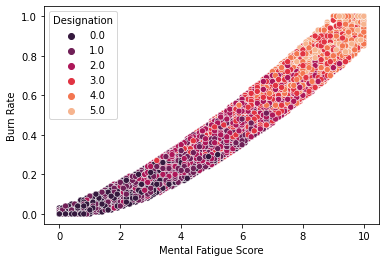

In [20]:
sns.scatterplot(x = 'Mental Fatigue Score', y = 'Burn Rate', hue = 'Designation', palette = sns.color_palette("rocket"), data = dftr)

This indicates a very strong linear relationship between the Fatigue Score and Burn rate.

It seems 'heatmap' shows the correlations/map for all the numerical variables (obviously skipping the categorical ones.


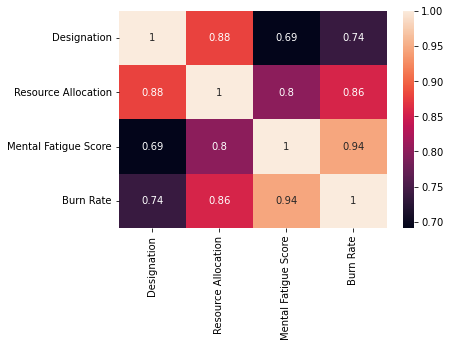

In [21]:
sns.heatmap(dftr.corr(), annot = True) 
print("It seems 'heatmap' shows the correlations/map for all the numerical variables (obviously skipping the categorical ones.")

Apart from Mental Fatigue Score, Burn Rate shows a strong positive linear relationship with Resource Allocation.

<AxesSubplot:xlabel='Resource Allocation', ylabel='Burn Rate'>

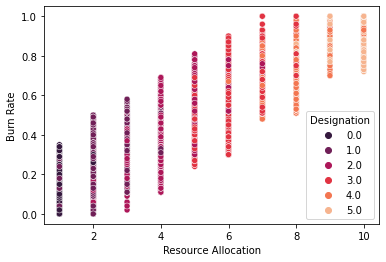

In [22]:
sns.scatterplot(x = 'Resource Allocation', y = 'Burn Rate', hue = 'Designation', palette = sns.color_palette("rocket"), data = dftr)

<AxesSubplot:xlabel='Designation', ylabel='Burn Rate'>

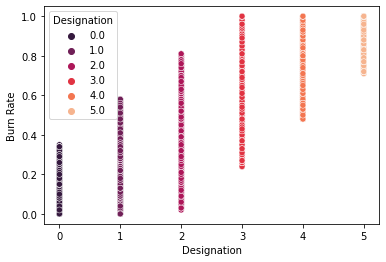

In [23]:
sns.scatterplot(x = 'Designation', y = 'Burn Rate', hue = 'Designation', palette = sns.color_palette("rocket"), data = dftr)

<AxesSubplot:xlabel='Resource Allocation', ylabel='Designation'>

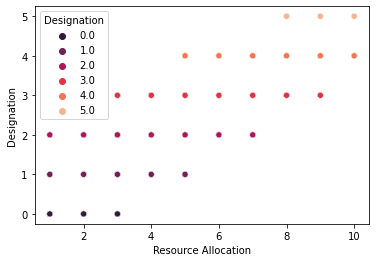

In [24]:
sns.scatterplot(x = 'Resource Allocation', y = 'Designation', hue = 'Designation', palette = sns.color_palette("rocket"), data = dftr)

We can see that the scatter plot gets wider (despite an upward trend - thus some degree of correlation) for the variables whose 'heat-map' score is smaller (thus heat-map score reflects the degree of correlation).

### Categorical Encoding

This is the process of transforming the text data (data under categorical variable) into numbers so that the model is able to understand and extract valuable information from it. These are some powerful techniques of categorical encoding –

* **Ordinal Encoding** –  Involves the mapping of each unique label to an integral value. This type of encoding is advisable only if there is a known order/relationship between the categories. For example – Take an example of a variable Product Quality which has values – ‘Excellent’, ‘Very Good’, ‘Good’, ‘Average’, and ‘Poor’. Since this data has an order i.e ‘Excellent ‘>’Very Good’>’Good’>’Average’>’Poor’, we can use Ordinal Encoding to map  – ‘Poor’: 0, ‘Average’: 1, ‘Good’: 2, ‘Very Good’: 3, ‘Excellent’: 4.
* **One Hot Encoding** – This is the transformation of data into binary values based on the occurrence of categories. This is used only when there is no order/relationship between the categories. For example – In our data, we have a variable called Gender which consists of values –  Male and Female. Since there is no order, we use One Hot Encoding.

Let’s continue the hands-on part –

In [25]:
dftr["Gender"].describe()

count      22750
unique         2
top       Female
freq       11908
Name: Gender, dtype: object

In [26]:
dftr["Company Type"].describe()

count       22750
unique          2
top       Service
freq        14833
Name: Company Type, dtype: object

In [27]:
dftr["WFH Setup Available"].describe()

count     22750
unique        2
top         Yes
freq      12290
Name: WFH Setup Available, dtype: object

In [28]:
dftr.drop('Employee ID', axis=1, inplace=True)

In [29]:
dftr.head(2)

,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,2008-09-30,Female,Service,No,2.0,3.0,3.8,0.16
1,2008-11-30,Male,Service,Yes,1.0,2.0,5.0,0.36


We will be using ‘Date of Joining’ in the feature engineering part.

In [30]:
dat = pd.Series(dftr['Date of Joining'])

In [31]:
#dftr.drop('Date of Joining', axis=1, inplace=True)

Applying One hot encoding –

In [32]:
cat = [] #kp: List to carry the names of Categorical features
num = [] #kp: List to carry the names of Numerical features

for feat in dftr.columns:
    if(dftr[feat].dtype=='object'):
        cat.append(feat)
    else:
        num.append(feat)

In [33]:
print(cat, "\n", num)

['Date of Joining', 'Gender', 'Company Type', 'WFH Setup Available'] 
 ['Designation', 'Resource Allocation', 'Mental Fatigue Score', 'Burn Rate']


In [34]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown = 'ignore', sparse=False)
dummy_df = pd.DataFrame(encoder.fit_transform((dftr[cat])))
dummy_df.index = dftr.index
dummy_df.columns = encoder.get_feature_names(cat)

In [35]:
dummy_df.head()

,Date of Joining_2008-01-01,Date of Joining_2008-01-02,Date of Joining_2008-01-03,Date of Joining_2008-01-04,Date of Joining_2008-01-05,Date of Joining_2008-01-06,Date of Joining_2008-01-07,Date of Joining_2008-01-08,Date of Joining_2008-01-09,Date of Joining_2008-01-10,...,Date of Joining_2008-12-28,Date of Joining_2008-12-29,Date of Joining_2008-12-30,Date of Joining_2008-12-31,Gender_Female,Gender_Male,Company Type_Product,Company Type_Service,WFH Setup Available_No,WFH Setup Available_Yes
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0


In [36]:
dftr.drop(cat, axis=1, inplace = True)
dftr = pd.concat([dftr, dummy_df], axis=1)

In [37]:
dftr.head()

,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,Date of Joining_2008-01-01,Date of Joining_2008-01-02,Date of Joining_2008-01-03,Date of Joining_2008-01-04,Date of Joining_2008-01-05,Date of Joining_2008-01-06,...,Date of Joining_2008-12-28,Date of Joining_2008-12-29,Date of Joining_2008-12-30,Date of Joining_2008-12-31,Gender_Female,Gender_Male,Company Type_Product,Company Type_Service,WFH Setup Available_No,WFH Setup Available_Yes
0,2.0,3.0,3.8,0.16,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
1,1.0,2.0,5.0,0.36,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
2,2.0,NaN,5.8,0.49,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
3,1.0,1.0,2.6,0.20,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,3.0,7.0,6.9,0.52,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0


---------
## <font color="magenta">Another Aside/Digression: Note on using OneHotEncoder in scikit-learn to work on categorical features</font>

### One-hot Encoding Concepts & Python Code Examples
July 26, 2020 by Ajitesh Kumar (Ref0: https://vitalflux.com/one-hot-encoding-concepts-python-code-examples/)

In this post, you will learn about One-hot Encoding concepts and code examples using Python programming language. One-hot encoding is also called as dummy encoding. In this post, OneHotEncoder class of sklearn.preprocessing will be used in the code examples. As a data scientist or machine learning engineer, you must learn the one-hot encoding techniques as it comes very handy while training machine learning models. Some of the following topics will be covered in this post:
    
#### Table of Contents	

    One-Hot Encoding Concepts
    Disadvantages of One-hot Encoding
    OneHotEncoder for Single Categorical Feature
    ColumnTransformer & OneHotEncoder for Multiple Categorical Features
    Pandas get_dummies API for one-hot encoding
    Conclusion

#### One-Hot Encoding Concepts
Simply speaking, **one-hot encoding** is a technique which is used to **convert or transform a categorical feature** having string labels into **K numerical features** in such a manner that the value of one out of K (one-of-K) features is 1 and the **value of rest (K-1) features is 0**. It is also called as **dummy encoding** as the features created as part of these techniques are dummy features which don’t represent any real world features. Rather they are created for encoding the different values of categorical feature using dummy numerical features. The primary need for using one-hot encoding technique is to transform or convert the categorical features into numerical features such that machine learning libraries can use the values to train the model. Although, many machine learning library internally converts them, but it is recommended to convert these categorical features explicitly into numerical features (dummy features). Let’s understand the concept using an example given below.

Here is a Pandas data frame which consists of three features such as gender, weight and degree. You may note that two of the features, gender and degree have non-numerical values. They are categorical features. They need to be converted into numerical features.

In [38]:
listOfLists = [ ['male', 82, 'graduate'],
               ['female', 54, 'postgraduate'],
               ['female', 42, 'highschool'],
               ['female', 28, 'highschool']]
df = pd.DataFrame(listOfLists)
df.head()

,0,1,2
0,male,82,graduate
1,female,54,postgraduate
2,female,42,highschool
3,female,28,highschool


In [39]:
df.columns = ['gender', 'weight', 'degree']
df.head()

,gender,weight,degree
0,male,82,graduate
1,female,54,postgraduate
2,female,42,highschool
3,female,28,highschool


The above data frame when transformed into one-hot encoding technique will look like the following. Note that the categorical feature, gender, got transformed into two dummy features such as gender_male and gender_female. In the same manner, the categorical feature, degree, got transformed into two dummy features such as degree_graduate and degree_highschool. Note that in every row, only one of the dummy feature belonging to a specific feature will have value 1. The other feature will have value as 0. For example, when degree_graduate takes value as 1, other two related features such as degree_highschool and degree_postgraduate will have value as 0.

![Categorical features transformed into dummy features having numerical values](./Images/dummyFeaturesExample0.png)

In the following sections, you will learn about how to use class OneHotEncoder of sklearn.preprocessing to do one-hot encoding of the categorical features.

### Disadvantages of One-hot Encoding
Here are few disadvantages of one-hot encoding:

* For smaller cardinality, one-hot encoding works best. For example, if we want to represent categorical variables such as week (7 days) using one-hot encoding, this will be a matrix such as `[1,0,0,0,0,0,0]` for Sunday. However, for higher cardinality such as representing millions of customer_id, converting the feature to one-hot encoding and providing inputs to a machine learning model leads to a **sparse matrix**  that isn’t well suited for a number of machine learning algorithms. <font color="green">(From this [Ref](https://machinelearningmastery.com/sparse-matrices-for-machine-learning/#:~:text=A%20sparse%20matrix%20is%20a,of%20its%20coefficients%20are%20zero.): A sparse matrix is a matrix that is comprised of mostly zero values. Sparse matrices are distinct from matrices with mostly non-zero values, which are referred to as dense matrices. <i>A matrix is sparse if many of its coefficients are zero. The interest in sparsity arises because its exploitation can lead to enormous computational savings and because many large matrix problems that occur in practice are sparse.</i> — Page 1, Direct Methods for Sparse Matrices, Second Edition, 2017. The sparsity of a matrix can be quantified with a score, which is the number of zero values in the matrix divided by the total number of elements in the matrix.)</font>

* Another disadvantage of one-hot encoding is that it treats the categorical variables as being independent. If there is some relationship between categorical values, the same can not be represented using one-hot encoding.

#### OneHotEncoder for Single Categorical Feature
One-hot encoding for single categorical feature can be achieved using OneHotEncoder. The following code example illustrates the transformation of categorical feature such as gender that has two values. Note some of the following:

* When OneHotEncoder is instantiated with empty constructor function, the gender value gets converted into two feature columns.
* When OneHotEncoder is instantiated with drop=’first’, one of the dummy feature is dropped. This is because the value of remaining features when all 0’s will represent the dummy feature which got dropped. This is used to avoid multi-collinearity which can be an issue for certain methods (for instance, methods that require matrix inversion).

Here is the code sample for OneHotEncoder

In [40]:
from sklearn.preprocessing import OneHotEncoder
#
# Instantiate OneHotEncoder
#
ohe = OneHotEncoder()
#
# One-hot encoding degree column
#
ohe.fit_transform(df.degree.values.reshape(-1, 1)).toarray()

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [41]:
#
# OneHotEncoder with drop assigned to first
#
ohe = OneHotEncoder(drop='first')
#
# One-hot encoding degree column
#
ohe.fit_transform(df.degree.values.reshape(-1, 1)).toarray()

array([[0., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.]])

In [42]:
ohe.fit_transform(df.gender.values.reshape(-1, 1)).toarray()

array([[1.],
       [0.],
       [0.],
       [0.]])

### ColumnTransformer & OneHotEncoder for Multiple Categorical Features
When there is a need for encoding multiple categorical features, [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) can be used with [ColumnTransformer](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html). ColumnTransformer applies transformers to columns of an array or pandas DataFrame. The ColumnTransformer estimator allows different columns or column subsets of the input to be transformed separately and the features generated by each transformer will be concatenated to form a single feature space. 

Here is the code sample which represents the usage of ColumnTransformer class from sklearn.compose module for transforming one or more categorical features using OneHotEncoder.

In [43]:
from sklearn.compose import ColumnTransformer
 
ct = ColumnTransformer([('one-hot-encoder', OneHotEncoder(), ['gender', 'degree'])], remainder='passthrough')
#
# For OneHotEncoder with drop='first', the code would look like the following
#
ct2 = ColumnTransformer([('one-hot-encoder', OneHotEncoder(drop='first'), ['gender', 'degree'])], remainder='passthrough')
#
# Execute Fit_Transform
#
ct.fit_transform(df)

array([[ 0.,  1.,  1.,  0.,  0., 82.],
       [ 1.,  0.,  0.,  0.,  1., 54.],
       [ 1.,  0.,  0.,  1.,  0., 42.],
       [ 1.,  0.,  0.,  1.,  0., 28.]])

### Pandas get_dummies API for one-hot encoding
[Pandas get_dummies API](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html) can also be used for transforming one or more categorical features into dummy numerical features. This is one of the most preferred way of one-hot-encoding due to simplicity of the method / API usage. Here is the code sample:

In [44]:
#
# Transform feature gender and degree using one-hot-encoding
#
pd.get_dummies(df, columns=['gender', 'degree'])
#
# Transform feature gender and degree using one-hot-encoding; Drop the first dummy feature
#
pd.get_dummies(df, columns=['gender', 'degree'])

,weight,gender_female,gender_male,degree_graduate,degree_highschool,degree_postgraduate
0,82,0,1,1,0,0
1,54,1,0,0,0,1
2,42,1,0,0,1,0
3,28,1,0,0,1,0


In [45]:
pd.get_dummies(df, columns=['gender', 'degree'], drop_first=True)

,weight,gender_male,degree_highschool,degree_postgraduate
0,82,1,0,0
1,54,0,0,1
2,42,0,1,0
3,28,0,1,0


<font color="magenta">kp: Now I feel like I understand why we do `drop_first`. Looking at the above two tables we can understand that one of the new/encoded columns for each category is redundant. For example if we look at the two gender columns, if we remove the first one (i.e. the gender_female), and take the 0 values as 'females', then it would still carry the same information with no ambiguity or loss of information. Similarly, if we throw away the first of the 'degree' columns (i.e. the 'degree_graduate' one, then we can consider (0,0) for other two degrees as equivalent to '1' for the 'degree_graduate', so there would be no ambiguity or loss of information. Thus, in essence we will still have the same thing as the previous dataframe that had two extra columns. If we need to we can revive those columns out of the remaining ones. </font>

### Conclusion
Here is the summary of this post:

* One-hot encoding can be used to transform one or more categorical features into numerical dummy features useful for training machine learning model.
* One-hot encoding is also called dummy encoding due to the fact that the transformation of categorical features results into dummy features.
* OneHotEncoder class of sklearn.preprocessing module is used for one-hot encoding.
* ColumnTransformer class of sklearn.compose can be used for transforming multiple categorical features.
* Pandas get_dummies can be used for one-hot encoding.

### Following is the code I wrote to recreate the dataframe after encoding as shown in the image above.

In [46]:
#This df was created above as well 
listOfLists = [ ['male', 82, 'graduate'],
               ['female', 54, 'postgraduate'],
               ['female', 42, 'highschool'],
               ['female', 28, 'highschool']]
df = pd.DataFrame(listOfLists)
df.columns = ['gender', 'weight', 'degree']
df.head()

,gender,weight,degree
0,male,82,graduate
1,female,54,postgraduate
2,female,42,highschool
3,female,28,highschool


In [47]:
print(df.degree)
print(df.degree.values)
print(df.degree.values.reshape(-1,1))

0        graduate
1    postgraduate
2      highschool
3      highschool
Name: degree, dtype: object
['graduate' 'postgraduate' 'highschool' 'highschool']
[['graduate']
 ['postgraduate']
 ['highschool']
 ['highschool']]


In [48]:
catEx = [] #kp: List to carry the names of Categorical features
numEx = [] #kp: List to carry the names of Numerical features

for feat in df.columns:
    if(df[feat].dtype=='object'):
        catEx.append(feat)
    else:
        numEx.append(feat)
        
print(catEx, "\n", numEx)

['gender', 'degree'] 
 ['weight']


In [49]:
from sklearn.preprocessing import OneHotEncoder
encoderEx = OneHotEncoder(handle_unknown = 'ignore', sparse=False)
encoderEx

OneHotEncoder(handle_unknown='ignore', sparse=False)

In [50]:
dummy_df2 = pd.DataFrame(encoderEx.fit_transform((df[catEx])))
display(dummy_df2)
print(dummy_df2.columns)
print(dummy_df2.index)
print(df.columns)
print(df.index)

,0,1,2,3,4
0,0.0,1.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,1.0,0.0


RangeIndex(start=0, stop=5, step=1)
RangeIndex(start=0, stop=4, step=1)
Index(['gender', 'weight', 'degree'], dtype='object')
RangeIndex(start=0, stop=4, step=1)


In [51]:
dummy_df2.index = df.index
print(dummy_df2.index)

RangeIndex(start=0, stop=4, step=1)


In [52]:
dummy_df2.columns = encoderEx.get_feature_names(catEx)
print(dummy_df2.columns)

Index(['gender_female', 'gender_male', 'degree_graduate', 'degree_highschool',
       'degree_postgraduate'],
      dtype='object')


In [53]:
df.drop(catEx, axis=1, inplace = True) #kp: Drops the  columns with categorical/string/object values so that we
#.     because we'll instead have new columns with the corresponding encoded (thus numerical) values.
display(df) #For now the two columns with categorical data is gone.

,weight
0,82
1,54
2,42
3,28


In [54]:
df = pd.concat([df, dummy_df2], axis=1) #Now add new columns with the corresponding encoded values
#kp:  Basically here we bring and stack/slap togeter two data frames of identical # of rows to make a
#.      new one i.e. old df (with only 1 column for weight) and and dummy_df2 with 5 columns 
display(df)

,weight,gender_female,gender_male,degree_graduate,degree_highschool,degree_postgraduate
0,82,0.0,1.0,1.0,0.0,0.0
1,54,1.0,0.0,0.0,0.0,1.0
2,42,1.0,0.0,0.0,1.0,0.0
3,28,1.0,0.0,0.0,1.0,0.0


### Some related stuff from web-forums

Ref1 (https://stackoverflow.com/questions/36631163/what-are-the-pros-and-cons-between-get-dummies-pandas-and-onehotencoder-sciki) 

#### Q:
I found a tutorial on how to use OneHotEncoder() on https://xgdgsc.wordpress.com/2015/03/20/note-on-using-onehotencoder-in-scikit-learn-to-work-on-categorical-features/ (kp: See the copy of this content from Ref2 below - it's very short, not really a tutorial, but just a note) since the sklearn documentation wasn't too helpful on this feature. I have a feeling I'm not doing it correctly...but

Can some explain the pros and cons of using pd.dummies over sklearn.preprocessing.OneHotEncoder() and vice versa? I know that OneHotEncoder() gives you a sparse matrix but other than that I'm not sure how it is used and what the benefits are over the pandas method. Am I using it inefficiently?
#### A1:
For machine learning, you almost definitely want to use sklearn.OneHotEncoder. For other tasks like simple analyses, you might be able to use pd.get_dummies, which is a bit more convenient.

Note that sklearn.OneHotEncoder has been updated in the latest version so that it does accept strings for categorical variables, as well as integers.

The crux of it is that the sklearn encoder creates a function which persists and can then be applied to new data sets which use the same categorical variables, with consistent results.
```python
from sklearn.preprocessing import OneHotEncoder

# Create the encoder.
encoder = OneHotEncoder(handle_unknown="ignore")
encoder.fit(X_train)    # Assume for simplicity all features are categorical.

# Apply the encoder.
X_train = encoder.transform(X_train)
X_test = encoder.transform(X_test)
```
Note how we apply the same encoder we created via X_train to the new data set X_test.

Consider what happens if X_test contains different levels than X_train for one of its variables. For example, let's say X_train["color"] contains only "red" and "green", but in addition to those, X_test["color"] sometimes contains "blue".

If we use pd.get_dummies, X_test will end up with an additional "color_blue" column which X_train doesn't have, and the inconsistency will probably break our code later on, especially if we are feeding X_test to an sklearn model which we trained on X_train.

And if we want to process the data like this in production, where we're receiving a single example at a time, pd.get_dummies won't be of use.

With sklearn.OneHotEncoder on the other hand, once we've created the encoder, we can reuse it to produce the same output every time, with columns only for "red" and "green". And we can explicitly control what happens when it encounters the new level "blue": if we think that's impossible, then we can tell it to throw an error with handle_unknown="error"; otherwise we can tell it to continue and simply set the red and green columns to 0, with handle_unknown="ignore".
#### A2:
OneHotEncoder cannot process string values directly. If your nominal features are strings, then you need to first map them into integers.

pandas.get_dummies is kind of the opposite. By default, it only converts string columns into one-hot representation, unless columns are specified.

#### A3:
answered Oct 21, 2019 at 19:44   Carl

why wouldn't you just cache or save the columns as variable col_list from the resulting get_dummies then use pd.reindex to align the train vs test datasets.... example:
```python
df = pd.get_dummies(data)
col_list = df.columns.tolist()

new_df = pd.get_dummies(new_data)
new_df = new_df.reindex(columns=col_list).fillna(0.00) 
```
* C1: How does this answer the question? – jorijnsmit Nov 30, 2019 at 8:43
* C2: more to refute the previous comment that Sklearn OHE is supperior because of handle_unknown. The same can be accomplished using pandas reindex. – Carl Dec 18, 2019 at 17:49
* There can be a sneaky problem with using get_dummies except as a one off run. What happens if you have drop_first=True and the next sample doesn't include the dropped value? – Mint Jan 2, 2020 at 16:32

---------

Ref2 (https://xgdgsc.wordpress.com/2015/03/20/note-on-using-onehotencoder-in-scikit-learn-to-work-on-categorical-features/) Posted on March 20, 2015 by xgdgsc 

OneHotEncoder is used to transform categorical feature to a lot of binary features. The fit method takes an argument of array of int. But one thing not clearly stated in the document is that the np.max(int_array) + 1 should be equal to the number of  categories. Otherwise, if you have discrete integers, some very large, you will have a huge memory leak. And get Memory Error.

So the best way is to use LabelEncoder() first to convert discrete integers to a continuous integer set with a smaller max value:

```python
encoder = sklearn.preprocessing.OneHotEncoder()
label_encoder = sklearn.preprocessing.LabelEncoder()
data_label_encoded = label_encoder.fit_transform(data['category_feature'])
data['category_feature'] = data_label_encoded
data_feature_one_hot_encoded = encoder.fit_transform(data[['category_feature']].as_matrix())
```
Then a sparse matrix containing one hot encoded categorical feature is generated.

--------
<font color="magenta">The end of the aside/digression on OneHotEncoder</font>

--------

### Dealing with missing values

Some of the methods that are used to handle null values in the data are –

* **Random Sample Imputation** – It involves taking random observations from the dataset and using it to replace null values. It is appropriate when the data are missing completely at random (MCAR).
* **Imputing Mean/Median** – This is the method of filling the missing data with the mean/median of their respective attribute. It is appropriate when the data are **missing at random (MAR)**.
* **Predicting the null values** – When there is high collinearity between the attribute with null values and the one free of null values, it is suitable to use Linear Regression to predict and fill the missing values.

In [55]:
dftr.isnull().sum()

Designation                      0
Resource Allocation           1381
Mental Fatigue Score          2117
Burn Rate                     1124
Date of Joining_2008-01-01       0
                              ... 
Gender_Male                      0
Company Type_Product             0
Company Type_Service             0
WFH Setup Available_No           0
WFH Setup Available_Yes          0
Length: 376, dtype: int64

* The null values in all the columns are missing at random. Probably the employees didn’t want to share/ hesitated to share the information like stress score, burn rate, and the working hours.
* There are missing values in Burn Rate and Mental Fatigue score. Let’s visualize their distribution.

<AxesSubplot:>

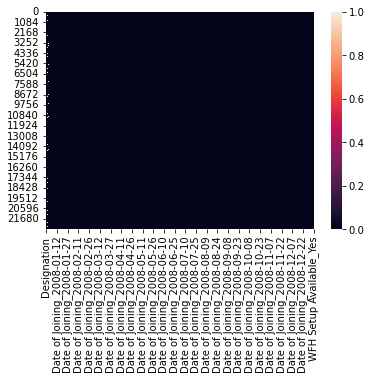

In [56]:
sns.heatmap(dftr.isnull())

In [57]:
dftr['Burn Rate'].isnull().sum()

1124

In [58]:
dftr['Resource Allocation'].isnull().sum()

1381

In [59]:
dftr['Mental Fatigue Score'].isnull().sum()

2117

In [60]:
dftr[dftr['Burn Rate'].isnull()].isnull().sum()

Designation                      0
Resource Allocation            103
Mental Fatigue Score           172
Burn Rate                     1124
Date of Joining_2008-01-01       0
                              ... 
Gender_Male                      0
Company Type_Product             0
Company Type_Service             0
WFH Setup Available_No           0
WFH Setup Available_Yes          0
Length: 376, dtype: int64

In [61]:
dftr[dftr['Burn Rate'].isnull()]['Resource Allocation'].isnull().sum()

103

In [62]:
dftr[dftr['Burn Rate'].isnull()]['Mental Fatigue Score'].isnull().sum()

172

We observe that the null values in the two features –  do not occur simultaneously (only 172 values occur simultaneously) for a given sample. So we impute the missing value of target (kp: i.e. 'Burn Rate') through Mental Fatigue Score and vice versa using Linear Regression due to their strong collinearity. We will use median/mean imputation for the rest of the missing values (Where null values occur simultaneously).

In [63]:
x1 = pd.DataFrame(dftr[dftr['Burn Rate'].isnull()]['Mental Fatigue Score'])
x1.head(2)

,Mental Fatigue Score
45,NaN
47,NaN


In [64]:
x1["Mental Fatigue Score"].fillna(x1["Mental Fatigue Score"].median(),inplace=True) #Filling 
#     the simultaneously occuring null values for Mental Fatigue Score with median imputation.

In [65]:
x1.head(2)

,Mental Fatigue Score
45,5.8
47,5.8


### Imputation using Linear Regression
Using Mental Fatigue Score as the independent feature and Burn Rate as the dependent feature in the linear regression model.

In [66]:
df_new = dftr[['Mental Fatigue Score','Burn Rate']] #the training data with no null values
df_new.dropna(inplace=True)

/Users/kpadhikari/opt/anaconda3/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [67]:
from sklearn.linear_model import LinearRegression
X = df_new[['Mental Fatigue Score']] # X.shape should be (N, M) where M >= 1
y = df_new[['Burn Rate']]
print(X.shape, y.shape)
model = LinearRegression()
model.fit(X,y)


(19681, 1) (19681, 1)


LinearRegression()

In [68]:
pred = model.predict(x1) #the values to be filled in nan values of burn rate
pred

array([[0.45880462],
       [0.45880462],
       [0.39070912],
       ...,
       [0.4198929 ],
       [0.33234154],
       [0.47826048]])

In [69]:
ind = dftr[dftr['Burn Rate'].isnull()].index #Getting the indices where the values are null for Burn Rate
ind

Int64Index([   45,    47,    52,    91,   122,   127,   135,   141,   147,
              166,
            ...
            22536, 22553, 22580, 22603, 22687, 22699, 22706, 22711, 22733,
            22741],
           dtype='int64', length=1124)

In [70]:
for j,i in enumerate(ind):
    dftr['Burn Rate'].iloc[i] = pred[j] #Filling the missing values with the predicted values

### <font color="magenta">An Aside on 'Looping using enumerate()'</font>
Ref: https://www.analyticsvidhya.com/blog/2021/02/iteration-in-python-enumerate-item-np-nditer-iterrows/

Using a for loop to iterate over a list only gives us access to every list element in each run, one after the other. If one also wants to access the index information, so where the list element we are iterating over is located, we can use enumerate().

In [71]:
import numpy as np
testAr = np.array([5.0, 2.0, 3.0, 4.0])

for x in testAr:
    print(x)

for j,i in enumerate(testAr):
    print(j, i)

5.0
2.0
3.0
4.0
0 5.0
1 2.0
2 3.0
3 4.0


<font color="magenta"> End of the Aside on 'enumerate()' of ndarray</font>

-----

Apply the same steps to fill the missing values in Mental Fatigue Score. This time we use Burn Rate as the independent feature and Mental Fatigue Score as the dependent feature for the linear regression model.



In [72]:
X = df_new[['Burn Rate']] # X.shape should be (N, M) where M >= 1
y = df_new['Mental Fatigue Score']
model = LinearRegression()
model.fit(X,y)

LinearRegression()

In [73]:
x2 = pd.DataFrame(dftr[dftr['Mental Fatigue Score'].isnull()]['Burn Rate'])
pred = model.predict(x2)
ind = dftr[dftr['Mental Fatigue Score'].isnull()].index
for j,i in enumerate(ind):
  dftr['Mental Fatigue Score'].iloc[i] = pred[j]


We are left with missing values in Resource Allocation. We will use the same technique i.e Linear Regression to impute the null values of Resource Allocation since it has a high correlation with Designation. The independent feature will be Designation and the target feature will be Resource Allocation.

In [74]:
df_new = dftr[['Designation','Resource Allocation']]
df_new.dropna(inplace=True)

/Users/kpadhikari/opt/anaconda3/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [75]:
X = df_new[['Designation']]
y = df_new['Resource Allocation']

model = LinearRegression()
model.fit(X,y)

LinearRegression()

In [76]:
des = pd.DataFrame(dftr[dftr['Resource Allocation'].isnull()]['Designation'])

pred2 = model.predict(des)
ind = dftr[dftr['Resource Allocation'].isnull()].index
for j,i in enumerate(ind):
    dftr['Resource Allocation'].iloc[i] = pred2[j]

### Outliers

It’s time to remove the outliers that we detected in few features during EDA using boxplot visualization.

Outliers are points in the data that fall far away from the other observation. The presence of outliers can spoil and mislead the training process of the model. Hence it is important to handle them.

Here we’ll use log transformation on data to get rid of the outliers. We’ll use this method on the features with the modulus of their [skewness](https://www.investopedia.com/terms/s/skewness.asp) >0.5 since data with skewness less than 0.5 follows a fairly symmetrical distribution.

In [77]:
for feat in num:
    if((np.abs(dftr[feat].skew())>0.5)):
        print(feat)
        dftr[feat] =np.log1p(dftr[feat])[0]

### Output 
– There are no such features that have skewness greater than 0.5.

We have completed data preparation and EDA!

## Feature Engineering
The process of Feature Engineering involves the extraction of features from the raw data based on its insights. Moreover, feature engineering also involves feature selection, feature transformation, and feature construction to prepare input data that best fits the machine learning algorithms. Feature Engineering influences the results of the model directly and hence it’s a crucial part of data science.

Let’s use Date of Joining to create a new feature – Days Spent that would contain the information about how many days has the employee worked in the company till date. Burn Rate for an employee who has worked for years will be perhaps much higher than a newly joined employee.

In [78]:
from datetime import date
present = date.today()
present

datetime.date(2022, 2, 27)

In [79]:
date_df = pd.DataFrame(dat) #See above 'dat = pd.Series(df['Date of Joining'])'
date_df.head(2)

,Date of Joining
0,2008-09-30
1,2008-11-30


In [80]:
from datetime import datetime
date_df['Date of Joining'] = date_df['Date of Joining'].apply(lambda x : datetime.strptime(x,"%Y-%m-%d").date())
date_df.head(2)

,Date of Joining
0,2008-09-30
1,2008-11-30


In [81]:
dftr['Days Spent'] = present - date_df['Date of Joining'] #Get the total number of days spent in the company
dftr['Days Spent'] = dftr['Days Spent'].apply(lambda x : int(str(x).split(" ")[0]))
display(dftr.shape)
dftr.head(2)

(22750, 377)

,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,Date of Joining_2008-01-01,Date of Joining_2008-01-02,Date of Joining_2008-01-03,Date of Joining_2008-01-04,Date of Joining_2008-01-05,Date of Joining_2008-01-06,...,Date of Joining_2008-12-29,Date of Joining_2008-12-30,Date of Joining_2008-12-31,Gender_Female,Gender_Male,Company Type_Product,Company Type_Service,WFH Setup Available_No,WFH Setup Available_Yes,Days Spent
0,2.0,3.0,3.8,0.16,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,4898
1,1.0,2.0,5.0,0.36,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,4837


Let’s check if the new feature has any effect on the target –

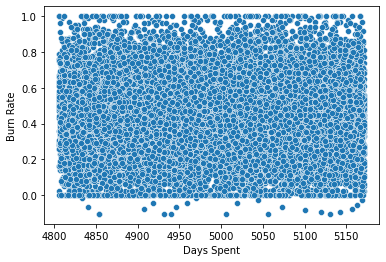

In [82]:
sns.scatterplot(x = dftr['Days Spent'],y = dftr['Burn Rate']);

The scatterplot shows that there are no trends in the data of Burn Rate vs Days Spent. So we drop Days Spent as it has no importance in the data.

In [83]:
dftr.drop('Days Spent',axis=1,inplace=True)
display(dftr.shape)

(22750, 376)

## Model Building and Evaluation
Let’s find the performance of different ensemble techniques on the data 
1. XGBoost 
2. AdaBoost 
3. RandomForest. 

Please read this [blog](https://www.analyticsvidhya.com/blog/2021/08/ensemble-stacking-for-machine-learning-and-deep-learning/) for an understanding of ensemble techniques and their different types. We’ll use the [‘R-squared‘](https://www.geeksforgeeks.org/ml-r-squared-in-regression-analysis/#:~:text=R%2Dsquared%20is%20a%20statistical,for%20r%2Dsquare%20is%201.&text=The%20more%20the%20value%20of,than%20the%20average%20fitted%20model.) as the metric since we are training a regression model.

In [84]:
!pip install xgboost  #installed xgboost-1.5.2 with this (on 2/26/2022)

In [85]:
#!conda install xgboost

In [86]:
import time
#https://www.kaggle.com/stuarthallows/using-xgboost-with-scikit-learn
#from sklearn.linear_model import XGBRegressor
#import xgboost as xgb
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostRegressor.html
#from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor #without installing it with 'conda install xgboost', this line didn't work 
#.  i.e., the 'pip' installed one didn't work.
from sklearn.model_selection import cross_val_score

model1 = XGBRegressor()
X = dftr.drop('Burn Rate',axis=1)
y = dftr['Burn Rate']
print("The code  cross_val_score(model1,X,y,cv = 5,scoring = 'r2')  is working ..... ")
start = time.time()
score = cross_val_score(model1,X,y,cv = 5,scoring = 'r2') #K fold cross validation
end = time.time()
print(f'XGBRegressor took {end-start} seconds to complete')
print("The work is done!!!")
#This cell took quite a while to complete the run (on my Macbook Air 13-inch, Early 2014, macOS Big Sur Version 11.6.2
#.      with 1.7 Ggz Dual-Core Intel Core i7 processor, 8 GB 1600 MHz DDR3 and Intel HD Graphics 5000 1536 MB.

The code  cross_val_score(model1,X,y,cv = 5,scoring = 'r2')  is working ..... 
XGBRegressor took 179.9597659111023 seconds to complete
The work is done!!!


In [87]:
score.mean() #The tutorial was listing 0.9323 as the output

0.9310547543457236

In [88]:
print("check")

check


In [89]:
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostRegressor.html
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import cross_val_score
model2 = AdaBoostRegressor()
start = time.time()
score2 = cross_val_score(model2,X,y,cv = 5, scoring = 'r2')
end = time.time()
print(f'AdaBoostRegressor took {end-start} seconds to complete')

AdaBoostRegressor took 73.18245100975037 seconds to complete


In [90]:
score2.mean()

0.9128843887684235

In [91]:
import time
from sklearn.ensemble import RandomForestRegressor
#from sklearn.model_selection import cross_val_score
model3 = RandomForestRegressor()
start = time.time()
score3 = cross_val_score(model3,X,y,cv = 5, scoring = 'r2')
end = time.time()
print(f'RandomForestRegressor took {end-start} seconds to complete')
score3.mean()

RandomForestRegressor took 281.4338307380676 seconds to complete


0.9257681523767134

All the 3 algorithms have given pretty good results. We can further improve the results by improvising the preceding stages of the lifecycle like scaling the data, changing the technique of null value imputation and categorical encoding, performing feature selection to get rid of unimportant features, hyperparameter optimization, etc.


### <font color="magenta">An Aside/Digression: On time modules</font>
Ref: https://www.geeksforgeeks.org/how-to-check-the-execution-time-of-python-script/

There are many python modules like time, timeit, and datetime in Python which can store the time at which the particular section of the program is being executed. By manipulating or getting the difference between times of beginning and ending at which a particular section is being executed we can calculate the time it took to execute the section. 

 

The following methods can be used to compute time difference:
* Time module in Python provides various time-related functions. This module comes under Python’s standard utility modules. `time.time()` method of Time module is used to get the time in seconds since epoch. The handling of leap seconds is platform-dependent.
* Python `datetime` library defines a function that can be primarily used to get the current time and date. `now()` function Return the current local date and time, which is defined under datetime module.
* `timeit` runs your snippet of code millions of times (default value is 1000000) so that you get the statistically most relevant measurement of code execution time.

 <font color="magenta">End of the Aside/Digression on Time modules</font>
 
--------




### Hyperparameter optimization

It is the technique of selecting the optimal set of hyperparameters for the ML algorithm that gives the best results on the chosen metric. Random Search, Grid Search, Optuna, etc. are some of the methods to tune the hyperparameters of a learning algorithm.

Let’s optimize the hyperparameters of XGBoost –

In [92]:
from sklearn.model_selection import RandomizedSearchCV
#import xgb
#xgb.set_config(verbosity=0)

regressor = XGBRegressor()

param_grid = {
    "colsample_bytree" : np.arange(0.1,1,0.1),
    "gamma" : np.arange(0.01,0.1,0.01),
    "learning_rate" : np.arange(0.01,0.1,0.01),
    "max_depth" : np.arange(2,10),
    "n_estimators" : np.arange(1500,2500,100),
    "reg_alpha" : np.arange(0,1,0.1),
    "reg_lambda" : np.arange(0,1,0.1),
    "subsample" : np.arange(0.1,1,0.1),
    "silent" : [1],
    "nthread" : [-1],
    }

model = RandomizedSearchCV(
    estimator= regressor,
    param_distributions= param_grid,
    n_iter=20,
    scoring = 'r2',
    verbose= 3,
    n_jobs=1,
    cv = 5
)

model.fit(X,y)  

#I disabled above 'fit' line because the run went on forever without giving any result, rather
#.  just constantly giving messages such as follows :
"""
[CV 1/5] END colsample_bytree=0.30000000000000004, gamma=0.04, learning_rate=0.03, max_depth=2, n_estimators=1700, nthread=-1, reg_alpha=0.9, reg_lambda=0.9, silent=1, subsample=0.1;, score=0.927 total time= 3.5min
[23:50:18] WARNING: ../src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.
"""

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[12:17:38] WARNING: ../src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 1/5] END colsample_bytree=0.6, gamma=0.03, learning_rate=0.02, max_depth=4, n_estimators=2100, nthread=-1, reg_alpha=0.7000000000000001, reg_lambda=0.0, silent=1, subsample=0.8;, score=0.933 total time= 4.4min
[12:22:03] WARNING: ../src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 2/5] E

'\n[CV 1/5] END colsample_bytree=0.30000000000000004, gamma=0.04, learning_rate=0.03, max_depth=2, n_estimators=1700, nthread=-1, reg_alpha=0.9, reg_lambda=0.9, silent=1, subsample=0.1;, score=0.927 total time= 3.5min\n[23:50:18] WARNING: ../src/learner.cc:576: \nParameters: { "silent" } might not be used.\n\n  This could be a false alarm, with some parameters getting used by language bindings but\n  then being mistakenly passed down to XGBoost core, or some parameter actually being used\n  but getting flagged wrongly here. Please open an issue if you find any such cases.\n'

In [93]:
model.best_score_

0.9327991639026697

Output – 0.9327     <font color="magenta">###### (kp: This is the copied output)</font>

The hyperparameter tuning has given a slight increase in the model’s score. So we go with this tuned model. Now, let’s save the model-

In [96]:
!pwd

/Users/kpadhikari/GitStuff/KPAdhikari/PythonStuff/IPython_Jupyter_Notebooks/ML_Stuff


In [98]:
import pickle
filename = 'bunrout_model_xgb.pkl'

pickle.dump(model, open(filename, 'wb'))

In [99]:
!ls -lh

total 25184
-rw-r--r--  1 kpadhikari  staff   192K Feb  6 00:02 CapstoneProjectOnDSandML_EdX_IBM_DS0720EN.ipynb
-rw-r--r--  1 kpadhikari  staff   192K Feb  6 03:27 Capstone_Project_On_Data_Science_&_Machine_Learning_EdX_IBM_DS0720EN_fv2.ipynb
-rw-r--r--  1 kpadhikari  staff   191K Feb  6 03:28 Capstone_Project_On_Data_Science_&_Machine_Learning_EdX_IBM_DS0720EN_fv3.ipynb
drwxr-xr-x  8 kpadhikari  staff   256B Feb 27 00:33 Images
-rw-r--r--  1 kpadhikari  staff   620K Feb 27 22:18 IntroToLifecycleOfDataScienceProject.ipynb
-rw-r--r--  1 kpadhikari  staff   226K Dec 29 01:34 Machine_Learning_Tid_Bits_1.ipynb
-rw-r--r--  1 kpadhikari  staff   9.9M Feb 27 22:19 bunrout_model_xgb.pkl
drwxr-xr-x  6 kpadhikari  staff   192B Feb 24 13:43 data
drwxr-xr-x  3 kpadhikari  staff    96B Feb 27 01:50 downloadedNotebook


It’s time for model deployment!

Complete [code](https://github.com/YashK07/Burnout-Rate-Prediction-Heroku/blob/main/Burn_out_rate_Model_Building.ipynb) for the previous stages of the project.

## Model Deployment using Heroku

Now our aim is to build a web app that takes input information from the user and gives the prediction of Burn Rate for the user. To build it, we’ll use Flask, an API of Python that allows us to build up applications. After building the app, we’ll deploy it on Heroku.

**Note** – Other platforms where we can deploy the ML models are – Amazon AWS, Microsoft Azure, Google Cloud, etc.

The input information that we would collect from the user will be the features on which our Burn Rate predictive model has been trained –

* Designation of work of the user in the company in the range – [0 – 5]: 5 is the highest designation and 0 is the lowest.
* The number of working hours
* Mental Fatigue Score in the range – [0-10]: How much fatigue/tired does the user usually feels during working hours.
* Gender: Male/Female
* Type of the company: Service/Product
* Do you work from home: Yes/No

### Building app on Flask

Create a .py file for the app.

Import all the important libraries –



In [ ]:
from flask import Flask,render_template
import os
from flask import request
import pickle
import pandas as pd
import numpy as np
from xgboost import XGBRegressor

Initiate the Flask app and load the save model –

In [ ]:
app = Flask(__name__) #Initialize the flask app
model = pickle.load(open("model\bunrout_model_xgb.pkl", 'rb'))

Do the app routing for the home function that will render HTML page –


In [ ]:
@app.route('/')
def home():
    return render_template('index.html')

Create a function 'predict' that will be the most important backend work i.e to give back predictions based on the user input -


In [ ]:
@app.route('/predict',methods=['POST'])
def predict():
    if(request.method=="POST"):
        int_feat = ['Designation', 'Resource Allocation', 'Mental Fatigue Score', 'Gender', 'Company Type', 'WFH Setup Available']
        l = []
        for i in int_feat:
            val = int(request.form[i])
            l.append(val)
        #convert into array of shape -> (1,6)
    feat_arr = np.array(l).reshape(-1,1).reshape(1,6)
    input = pd.DataFrame(feat_arr,columns = ['Designation', 'Resource Allocation', 'Mental Fatigue Score', 'Gender_Female', 'Company Type_Service', 'WFH Setup Available_Yes'])
    prediction = float(model.predict(input)[0])
    prediction = round(prediction, 2)
    stat = 0
    #top 25 percentile
    if(prediction<=0.3):
        feedback1 = "Fantastic! You have a low burnout of {} .".format(prediction)
        return render_template("index_1.html",color = "color:#33CC00;",feedback = feedback1)
    #top 25 percentile to 75 percentile
    elif((prediction>0.3) & (prediction<=0.59)):
        feedback2 = "Not bad...You have a moderate burnout of {} .".format(prediction)
        return render_template("index_1.html",color = "color:#339900;",feedback = feedback2)
    #top 75 percentile to 90 percentile
    elif((prediction>0.59) & (prediction<=0.80)):
        feedback3 = "Oops!! You have a high burnout of {} .".format(prediction)
        return render_template("index_1.html",color = "color:#FF0000;",feedback = feedback3)
    #top 90 percentile to 99 percentile
    elif((prediction>0.8) & (prediction<=0.9)):
        feedback4 = "Ouch!!! You have a very high burnout of {} .".format(prediction)
        return render_template("index_1.html",color ="color:#CC0000;",feedback = feedback4)
    #top 99 percentile
    else:
        feedback5 = "Sorry! You have an extremly high burnout of {} .".format(prediction)
        return render_template("index_1.html",color ="color:#990000;",feedback = feedback5)

You can display some messages along with the prediction as in the above code to describe the degree of their burnout rate.

Let’s define the main function –

In [ ]:
if __name__ == "__main__":
    app.run('debug'==True)

Your Flask app is ready! Go through [index.html](https://github.com/YashK07/Burnout-Rate-Prediction-Heroku/blob/main/templates/index_1.html) for the frontend part of the web app.

Note – Create the index.html and save it in a directory called – templates.

### Deploying app on Heroku

Deployment on Heroku requires a reuirement.txt file. The requirements for this project  –

    Flask==1.1.1
    pandas==1.0.1
    numpy==1.18.1
    xgboost==0.90
    gunicorn==20.1.0
    scikit-learn>=0.18
    
Now create a Procfile which is a text file without a .txt extension. It defines the commands that are implemented by the app on startup. Procfile for this project –

    web: gunicorn app:app
    
Now push the project into your Github and connect the repo to Heroku for deployment –

![Heroku deployment](./Images/heroku_21534deploy.jpeg)
Deploying the Github repo of the project on Heroku

Congratulations! We have successfully created and deployed our web application ✌️

![Heroku app](./Images/heroku-api_app_burnout-rate-prediction.png)
Burnout Rate Prediction web app

Link of the web app: https://burnout-rate-prediction-api.herokuapp.com

It can be accessed from anywhere and be used to keep a check on the mental health of the employees.

### Improvisation

After the deployment, improvising the lifecycle stages of the project for delivering the best solution is yet another important stage.

So we have come to the end of the guide. From understanding the problem statement to delivering an end-to-end solution, we have all covered this in a single blog!

Do check the whole project code from – https://github.com/YashK07/Burnout-Rate-Prediction-Heroku. Please do start it 🌟 if you feel the app is worth it. Happy Learning !!

## About the author
I am Yash Khandelwal, a 3rd-year undergrad at Birla Institute of Technology, Mesra. Have a look at my other Machine Learning & Deep Learning [blogs](https://docs.google.com/document/d/16mT9iHdc06CR-9CAMGvCngmOv07hC9CM9Sl5oYfwcKs/edit?usp=sharing). Feedbacks are most welcomed 😁

I am looking forward to covering – end-to-end Deep Learning, sports analytics, and computer vision applications in my next blogs.

**Connect with me –**

Linkedin – https://www.linkedin.com/in/yash-khandelwal-a40484bb/

Github – https://github.com/YashK07

The media shown in this article are not owned by Analytics Vidhya and are used at the Author’s discretion.